In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

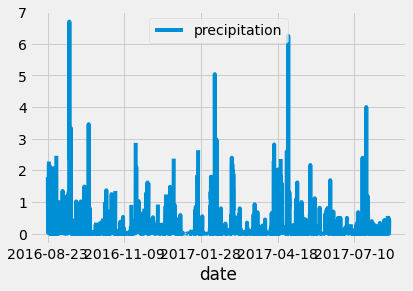

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# print(df)
# print(df.to_string(index=False))
# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

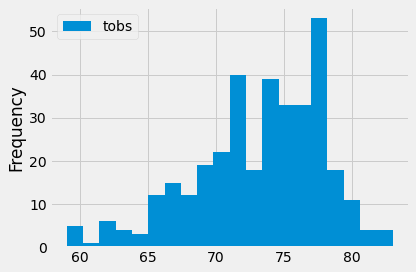

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=20)
plt.tight_layout()

In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

In [24]:
# See all the table columns
for class_instance in session.query(Measurement).all():
    print(vars(class_instance))

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb6ce4190>, 'tobs': 65.0, 'prcp': 0.08, 'station': 'USC00519397', 'date': '2010-01-01', 'id': 1}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb93d7c40>, 'tobs': 63.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2010-01-02', 'id': 2}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb93d7c70>, 'tobs': 74.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2010-01-03', 'id': 3}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb93d7cd0>, 'tobs': 76.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2010-01-04', 'id': 4}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb93d7d30>, 'tobs': 73.0, 'prcp': None, 'station': 'USC00519397', 'date': '2010-01-06', 'id': 5}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb93d7d90>, 'tobs': 70.0, 'prcp': 0.06, 'station': 'USC00519397', 'date': 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fbad30e80>, 'tobs': 76.0, 'prcp': 0.13, 'station': 'USC00519397', 'date': '2016-05-05', 'id': 2254}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fbad30f10>, 'tobs': 76.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2016-05-06', 'id': 2255}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fbad30fa0>, 'tobs': 73.0, 'prcp': 0.03, 'station': 'USC00519397', 'date': '2016-05-07', 'id': 2256}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fbad37070>, 'tobs': 73.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2016-05-08', 'id': 2257}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fbad37100>, 'tobs': 74.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2016-05-09', 'id': 2258}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fbad37190>, 'tobs': 75.0, 'prcp': 0.0, 'station': 'USC00519

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb8eeb4f0>, 'tobs': 73.0, 'prcp': 0.05, 'station': 'USC00513117', 'date': '2014-04-03', 'id': 4253}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb8eeb580>, 'tobs': 78.0, 'prcp': 0.01, 'station': 'USC00513117', 'date': '2014-04-04', 'id': 4254}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb8eeb610>, 'tobs': 73.0, 'prcp': 0.03, 'station': 'USC00513117', 'date': '2014-04-05', 'id': 4255}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb8eeb6a0>, 'tobs': 67.0, 'prcp': 0.1, 'station': 'USC00513117', 'date': '2014-04-06', 'id': 4256}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb8eeb730>, 'tobs': 70.0, 'prcp': 0.23, 'station': 'USC00513117', 'date': '2014-04-07', 'id': 4257}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb8eeb7c0>, 'tobs': 69.0, 'prcp': 0.02, 'station': 'USC00

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9e24bb0>, 'tobs': 72.0, 'prcp': 0.22, 'station': 'USC00514830', 'date': '2012-12-18', 'id': 6253}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9e24c40>, 'tobs': 76.0, 'prcp': 0.29, 'station': 'USC00514830', 'date': '2012-12-19', 'id': 6254}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9e24cd0>, 'tobs': 75.0, 'prcp': None, 'station': 'USC00514830', 'date': '2012-12-21', 'id': 6255}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9e24d60>, 'tobs': 77.0, 'prcp': 0.0, 'station': 'USC00514830', 'date': '2012-12-22', 'id': 6256}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9e24df0>, 'tobs': 74.0, 'prcp': None, 'station': 'USC00514830', 'date': '2012-12-24', 'id': 6257}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9e24e80>, 'tobs': 76.0, 'prcp': None, 'station': 'USC00

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9a3b220>, 'tobs': 80.0, 'prcp': None, 'station': 'USC00517948', 'date': '2013-08-22', 'id': 8252}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9a3b2b0>, 'tobs': 80.0, 'prcp': None, 'station': 'USC00517948', 'date': '2013-08-26', 'id': 8253}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9a3b340>, 'tobs': 80.0, 'prcp': 0.0, 'station': 'USC00517948', 'date': '2013-08-27', 'id': 8254}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9a3b3d0>, 'tobs': 77.0, 'prcp': 0.0, 'station': 'USC00517948', 'date': '2013-08-28', 'id': 8255}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9a3b460>, 'tobs': 75.0, 'prcp': 0.05, 'station': 'USC00517948', 'date': '2013-08-29', 'id': 8256}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fb9a3b4f0>, 'tobs': 78.0, 'prcp': None, 'station': 'USC005

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba34f8e0>, 'tobs': 71.0, 'prcp': 0.0, 'station': 'USC00519523', 'date': '2012-01-10', 'id': 10252}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba34f970>, 'tobs': 69.0, 'prcp': 0.0, 'station': 'USC00519523', 'date': '2012-01-11', 'id': 10253}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba34fa00>, 'tobs': 67.0, 'prcp': 0.0, 'station': 'USC00519523', 'date': '2012-01-12', 'id': 10254}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba34fa90>, 'tobs': 65.0, 'prcp': 0.0, 'station': 'USC00519523', 'date': '2012-01-13', 'id': 10255}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba34fb20>, 'tobs': 74.0, 'prcp': 0.0, 'station': 'USC00519523', 'date': '2012-01-14', 'id': 10256}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba34fbb0>, 'tobs': 75.0, 'prcp': 0.0, 'station': 'USC00

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba623f10>, 'tobs': 67.0, 'prcp': 0.33, 'station': 'USC00519281', 'date': '2010-03-05', 'id': 12251}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba623fa0>, 'tobs': 71.0, 'prcp': 0.51, 'station': 'USC00519281', 'date': '2010-03-06', 'id': 12252}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba62b070>, 'tobs': 70.0, 'prcp': 0.08, 'station': 'USC00519281', 'date': '2010-03-07', 'id': 12253}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba62b100>, 'tobs': 69.0, 'prcp': 0.53, 'station': 'USC00519281', 'date': '2010-03-08', 'id': 12254}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba62b190>, 'tobs': 69.0, 'prcp': 0.04, 'station': 'USC00519281', 'date': '2010-03-09', 'id': 12255}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba62b220>, 'tobs': 70.0, 'prcp': 0.45, 'station': 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba883610>, 'tobs': 76.0, 'prcp': 0.02, 'station': 'USC00519281', 'date': '2015-08-31', 'id': 14251}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba8836a0>, 'tobs': 76.0, 'prcp': 0.3, 'station': 'USC00519281', 'date': '2015-09-01', 'id': 14252}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba883730>, 'tobs': 73.0, 'prcp': 0.01, 'station': 'USC00519281', 'date': '2015-09-02', 'id': 14253}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba8837c0>, 'tobs': 74.0, 'prcp': 0.0, 'station': 'USC00519281', 'date': '2015-09-03', 'id': 14254}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba883850>, 'tobs': 75.0, 'prcp': 1.35, 'station': 'USC00519281', 'date': '2015-09-04', 'id': 14255}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7f7fba8838e0>, 'tobs': 83.0, 'prcp': 0.0, 'station': 'US

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

